# UCI Boston Housing Data - Price prediction
# Name - Ratndeep Chavan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('housing data.csv')

In [3]:
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [4]:
data.shape

(506, 14)

### dataset is very small so removing date is not the good option

In [5]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Finding the null values

In [6]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
data['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

### Null values are not present in dataset and also the catagerical varial values are in numericall format

## Finding correlation

In [9]:
corr = data.corr()

In [10]:
corr['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

<AxesSubplot:>

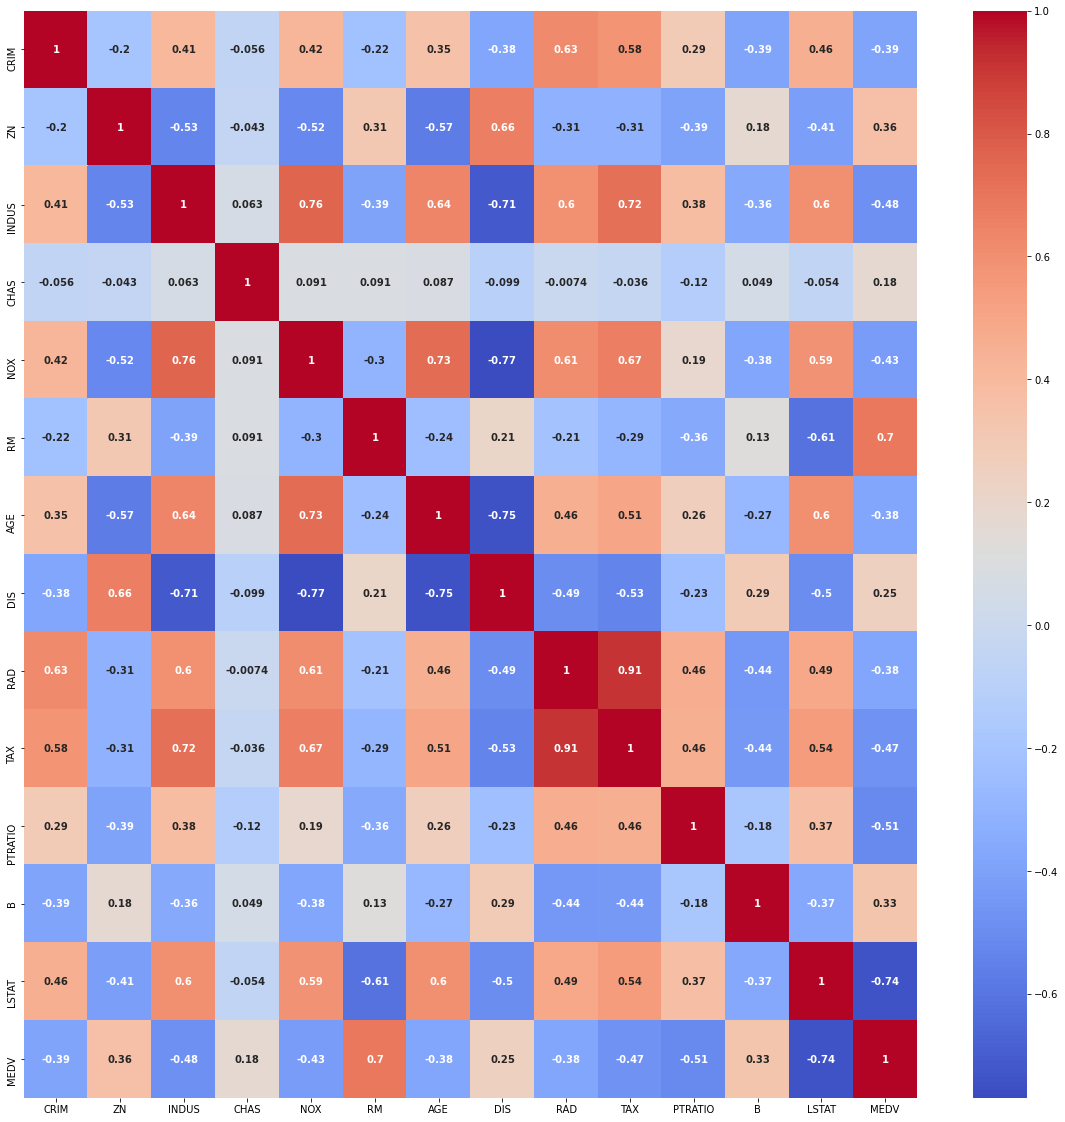

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap='coolwarm', annot_kws={'fontsize': 10, 'fontweight': 'bold'},)

## Spiting the data

### As there's very small vaules of 1 in 'CHAS' column we'll use stratify to distribute the values equally

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42, stratify=data['CHAS'])

In [14]:
train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [15]:
test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [16]:
x_train = train_set.drop('MEDV', axis=1)

In [17]:
y_train = train_set['MEDV']

In [18]:
x_test = test_set.drop('MEDV', axis=1)

In [19]:
y_test = test_set['MEDV']

## Selcting model

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model1 = LinearRegression()

In [22]:
model1.fit(x_train, y_train)

LinearRegression()

In [23]:
p1 = model1.predict(x_test)

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [25]:
mae = mean_absolute_error(y_test, p1)
rmae = np.sqrt(mae)
mse = mean_squared_error(y_test, p1)
rmse = np.sqrt(mse)

In [26]:
print(f'''MAE : {mae} , 
RMAE : {rmae}, 
MSE : {mse} 
RMSE : {rmse}''')

MAE : 3.0673884543350227 , 
RMAE : 1.7513961443188752, 
MSE : 17.17124049875935 
RMSE : 4.143819554319342


**Trying other model**

In [27]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
model2 = RandomForestRegressor()

In [29]:
model2.fit(x_train, y_train)

RandomForestRegressor()

In [30]:
p2 = model2.predict(x_test)

In [31]:
mae2 = mean_absolute_error(y_test, p2)
rmae2 = np.sqrt(mae2)
mse2 = mean_squared_error(y_test, p2)
rmse2 = np.sqrt(mse2)

In [32]:
print(f'''MAE : {mae2} , 
RMAE : {rmae2}, 
MSE : {mse2} 
RMSE : {rmse2}''')

MAE : 2.1170098039215675 , 
RMAE : 1.454994777970549, 
MSE : 9.09299728431372 
RMSE : 3.015459713594881


In [33]:
print(
f'''
MAE diff : {mae-mae2}
RMAE diff : {rmae-rmae2}
MSE diff : {mse-mse2}
RMSE diff : {rmse-rmse2}''')


MAE diff : 0.9503786504134553
RMAE diff : 0.29640136634832626
MSE diff : 8.07824321444563
RMSE diff : 1.1283598407244613


# Saving the model

In [34]:
import pickle

In [35]:
with open ('Prediction_model', 'wb') as f:
    pickle.dump(model2,f)

In [36]:
with open ('Prediction_model', 'rb') as f:
    mp = pickle.load(f)

In [37]:
model2.predict([[0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98]])

array([25.297])

In [38]:
mp.predict([[0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98]])

array([25.297])